<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231103_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def step_func(x):
    y =x>0
    return y.astype(int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_func(x):
    return x

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
a = np.array([1, 2, 3])

In [ ]:
a = a - a.max()

In [ ]:
a

array([-2, -1,  0])

\begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})} = \frac{C exp(a_{k})}{C \sum_{i=1}^{n} exp(a_{i})}
\end{equation*}
\\
\begin{equation*}
= \frac{exp(a_{k}+\ln C)}{\sum_{i=1}^{n} exp(a_{i}+\ln C)}
\end{equation*}

\\
\begin{equation*}
= \frac{exp(a_{k}+C')}{\sum_{i=1}^{n} exp(a_{i}+C')}
\end{equation*}

$$
10^2 = 100 \Leftrightarrow \log_{10} 100 =2 \\
\quad \\
\\
e^m = x \Leftrightarrow \log_e x = m \\
e^m = x \Leftrightarrow \ln x = m \\
\quad \\
\\
e^{\ln c} = x \Leftrightarrow \ln x = \ln c \\
\quad \\
\\
\therefore x = c, \quad
e^{\ln c} = c
$$

i = 1, 2 인 경우를 생각한다면, 소프트 맥스 함수의 정의에 따라

$$ y_k = {\frac{e^{x_k}}{\sum_{i=1}^n e^{x_i}}}$$

$$ $$
$$ y_1 = \frac{e^{x_1}}{e^{x_1}+e^{x_2}}, \quad y_2 = \frac{e^{x_2}}{e^{x_1}+e^{x_2}} $$

$$ $$

$$ \therefore y_1 + y_2 = \frac{e^{x_1} + e^{x_2}}{e^{x_1}+e^{x_2}} = 1$$

In [ ]:
a

array([-2, -1,  0])

In [ ]:
y = softmax(a)

In [ ]:
y

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
np.sum(y)

0.9999999999999999

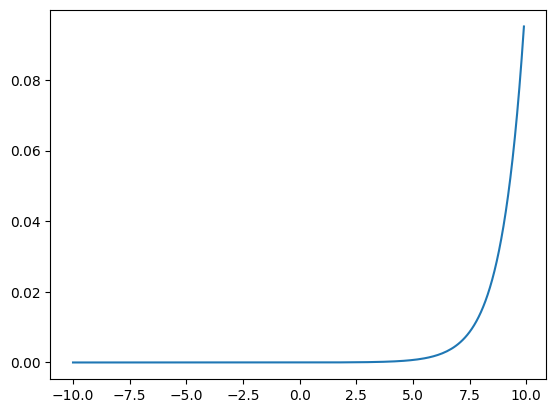

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, softmax(x))

시그모이드 : 2진 분류

소프트맥스 : 다중 분류

항등함수 : 회귀

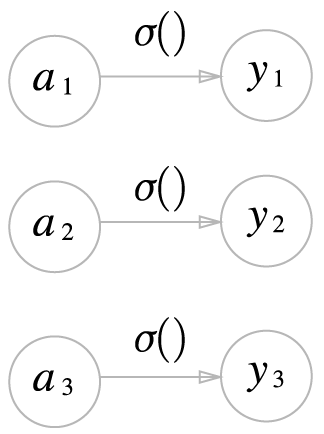

#3층 신경망 구현

In [ ]:
softmax(np.array([-10., 10.]))

array([2.06115362e-09, 9.99999998e-01])

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)


In [ ]:
X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [ ]:
A1.shape

(3,)

In [ ]:
A1

array([0.3, 0.7, 1.1])

In [ ]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

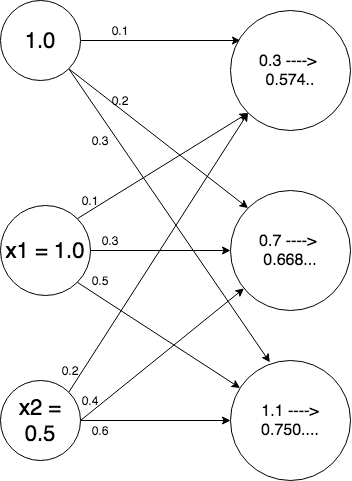

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
A2

array([0.51615984, 1.21402696])

In [ ]:
Z2

array([0.62624937, 0.7710107 ])

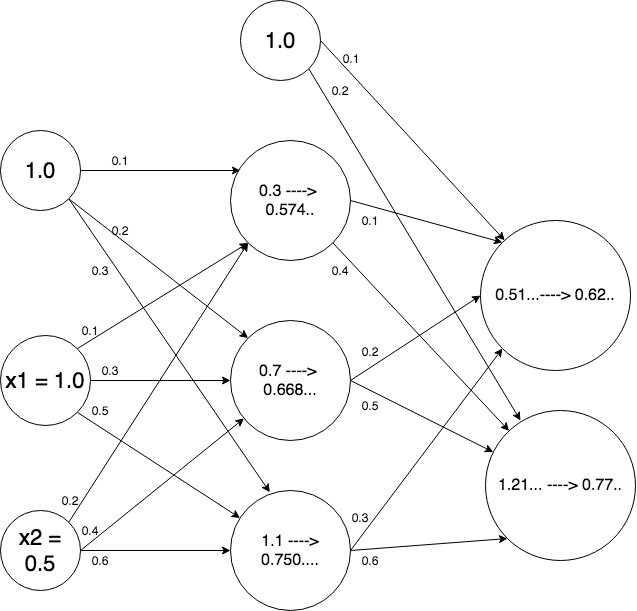

In [ ]:
X.shape, W1.shape, A1.shape, Z1.shape, W2.shape, A2.shape, Z2.shape

((2,), (2, 3), (3,), (3,), (3, 2), (2,), (2,))

In [ ]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
y = identity_func(A3)

In [ ]:
A3

array([0.31682708, 0.69627909])

In [ ]:
y

array([0.31682708, 0.69627909])

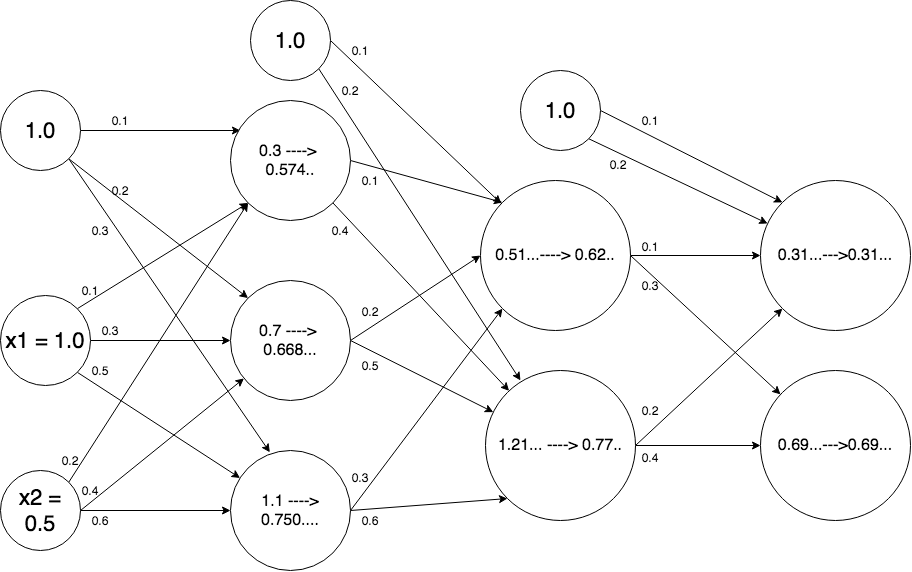

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    return network

In [ ]:
def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']

    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_func(A3)
    return Y

In [ ]:
network = init_network()

In [ ]:
network

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'B1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'B2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'B3': array([0.1, 0.2])}

In [ ]:
X = np.array([1.0, 0.5])

In [ ]:
Y = forward(network, X)

In [ ]:
Y

array([0.31682708, 0.69627909])

#손글씨 숫자 인식

이미지를 숫자 0부터 9 중 하나로 분류하는 문제 ->  출력층의 뉴런을 10개로 설정

출력층 뉴런은 위에서부터 차례로 0, 1, ..., 9에 대응.

이 신경망이 선택한 클래스는 y2, 입력 이미지를 숫자 '2'로 판단했음을 의미

추론 과정 : 신경망 순전파 (forward propagation)

학습단계 : 훈련데이터를 사용해 가중치를 학습

추론단계 : 학습된 가중치를 이용해 입력데이터를 분류 (predict)

손글씨 숫자 이미지 7만장 : MNIST 데이터 (이미지 1장의 크기 : 28 * 28)

In [ ]:
from mnist import load_mnist

In [ ]:
(X_train, t_train), (X_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
X_train.shape, t_train.shape

((60000, 784), (60000,))

In [ ]:
X_test.shape, t_test.shape

((10000, 784), (10000,))

In [ ]:
X_train[0]

In [ ]:
t_train[0]

5

In [ ]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
img = X_train[0]
label = t_train[0]

In [ ]:
img = img.reshape(28,28)

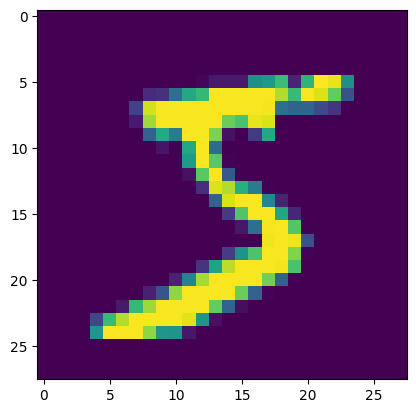

In [ ]:
plt.imshow(img)

In [ ]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open('./sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()

In [ ]:
x.shape, t.shape

((10000, 784), (10000,))

In [ ]:
network = init_network()

In [ ]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [ ]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p==t[i]:
        accuracy_cnt += 1

print('Accuracy : ', float(accuracy_cnt/len(x)))

Accuracy :  0.9352


In [ ]:
t[:3]

array([7, 2, 1], dtype=uint8)

In [ ]:
y

array([4.2882870e-04, 2.0043001e-06, 2.5405674e-03, 2.0168900e-06,
       5.5917702e-04, 3.1262045e-04, 9.9614763e-01, 4.3499372e-07,
       6.3756811e-06, 3.7751411e-07], dtype=float32)

In [ ]:
p

6

In [ ]:
t[i]

6

In [ ]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

((784, 50), (50, 100), (100, 10))

In [ ]:
x[0].shape, W1.shape, W2.shape, W3.shape, y.shape

((784,), (784, 50), (50, 100), (100, 10), (10,))

batch : 하나로 묶은 데이터

이점 : 효율적 계산 (시간절약), 버스에 주는 부하 줄임

그림 제공 : https://ml4a.github.io/ml4a/neural_networks/

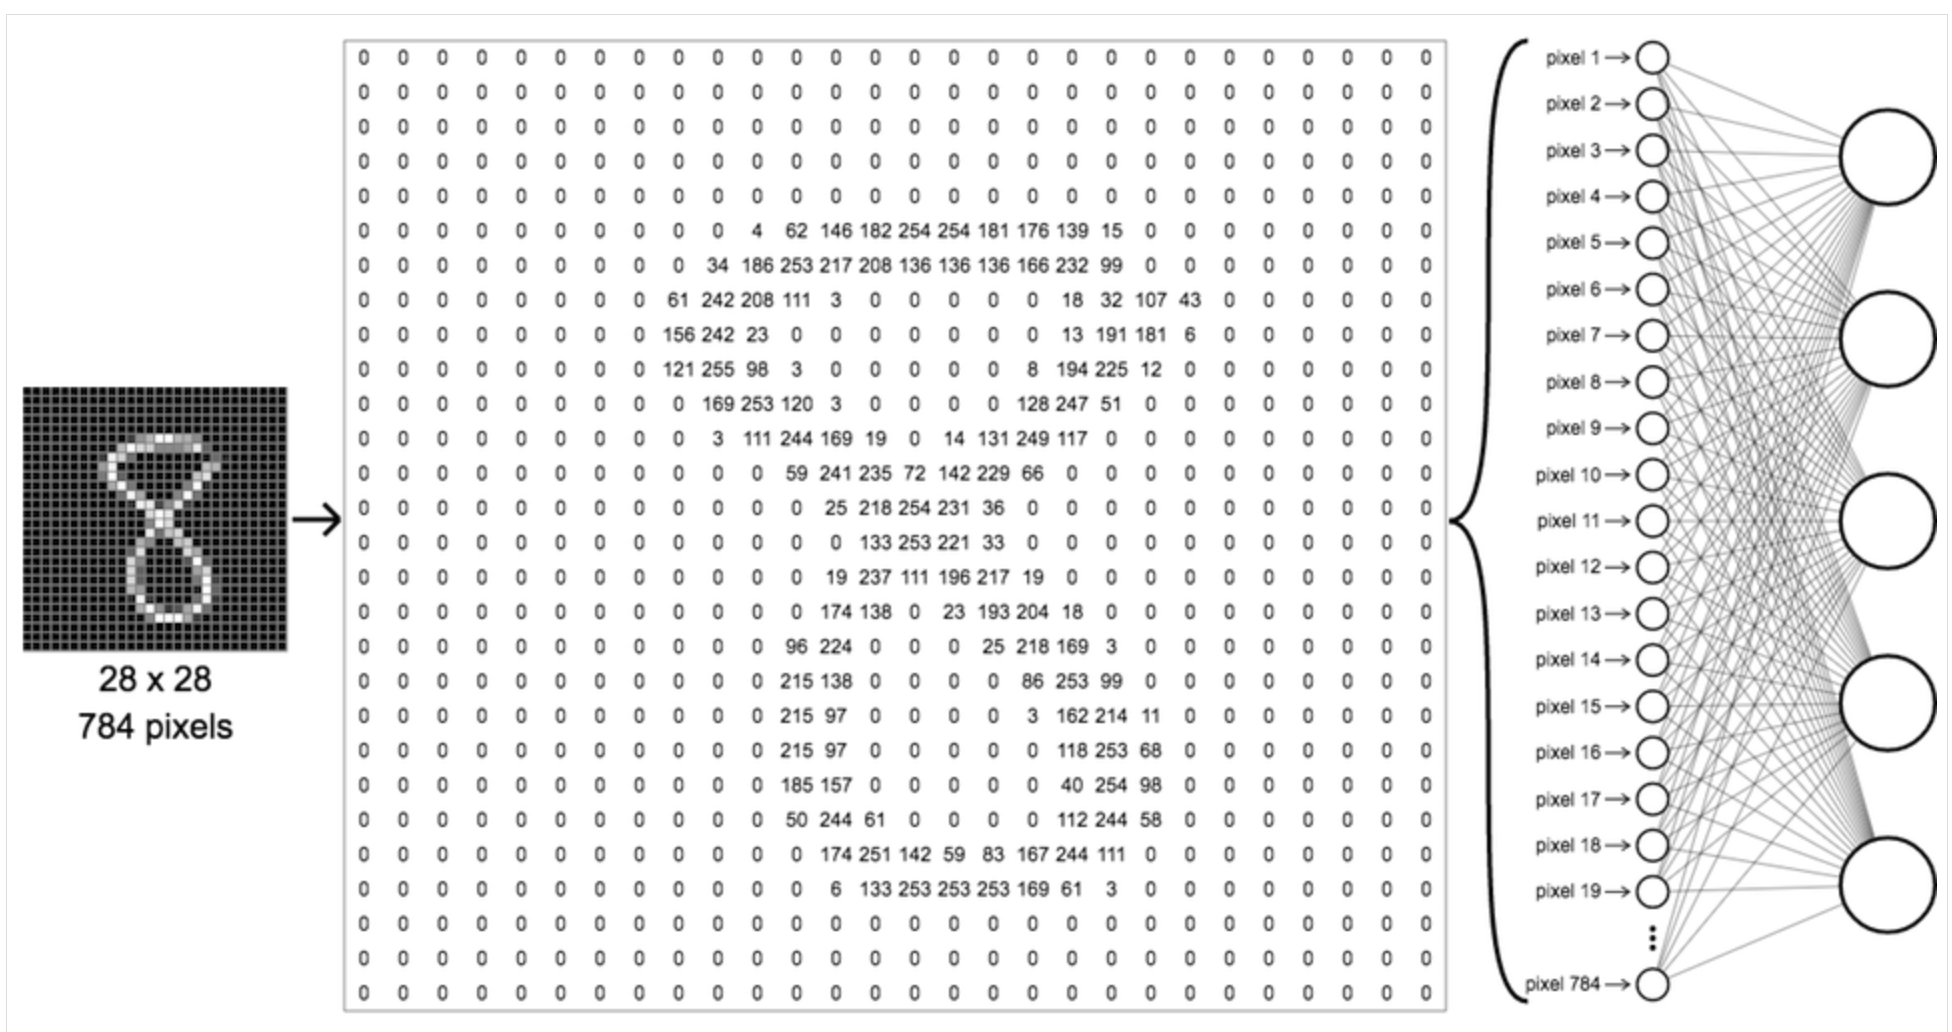

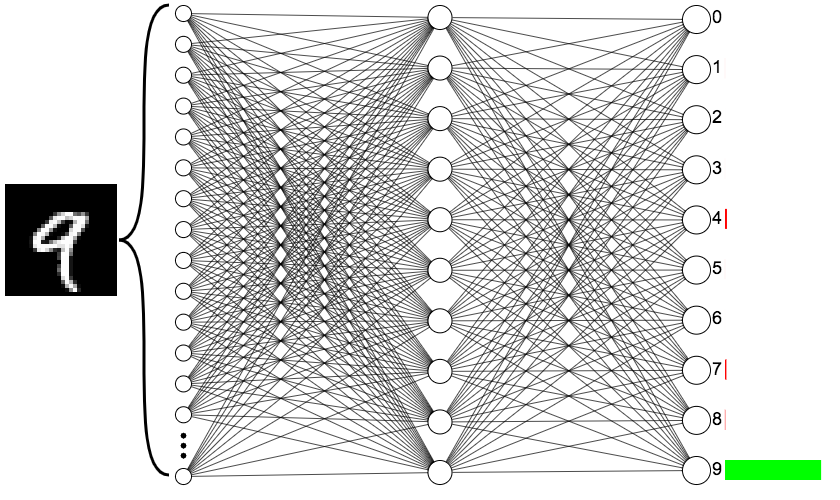

#배치사이즈가 100일때 y 의 형상
#(100 * 784)  (784, 50) (50, 100) (100, 10) -----> (100, 10)

In [ ]:
batch_size = 100

In [ ]:
ls ./drive/MyDrive/data/*.py

./drive/MyDrive/data/mnist.py


In [ ]:
from drive.MyDrive.data import mnist

In [ ]:
x, t = get_data()
network = init_network()

In [ ]:
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    #print(i, i+batch_size)
    y_batch = predict(network, x_batch)
    p=np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print('Acc : ', float(accuracy_cnt/len(x)))

Acc :  0.9352


---
---

In [ ]:
x_ = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6]]) #(2, 3)
y_ = np.argmax(x_, axis=1)
y_

array([1, 2])

In [ ]:
y_ = np.array([1, 2, 1, 0])
t_ = np.array([1, 2, 0, 0])

In [ ]:
y_==t_

array([ True,  True, False,  True])

In [ ]:
np.sum(y_==t_)

3

---
---

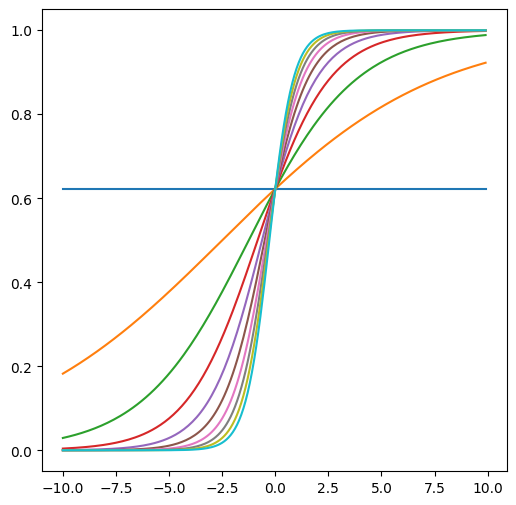

In [ ]:
x = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
W = np.arange(0, 2, 0.2)
b = 0.5

for w in W:
    f = 1/(1+np.exp(-(x*w+b)))
    ax.plot(x, f)

#Loss Function

1. Mean Squared Error


\begin{equation*}
E = \frac{1}{2} \sum_{k} (y_{k}-t_{k})^{2}
\end{equation*}

yk : 신경망의 출력 (추론한 결과)

tk : 정답값

k : 데이터의 차원수

In [ ]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
y = [0.6, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [ ]:
mean_squared_error(np.array(y), np.array(t))

0.5975

MSE 가 크면 정답에서 멀고

MSE 가 작으면 정답에 가깝다

2. Cross Entropy Error (CEE)

\begin{equation*}
E = - \sum_{k} t_{k} log y_{k}
\end{equation*}

log : 밑이 e 인 자연로그

yk : 신경망이 추론한 값

tk : 정답값

k : 데이터의 차원수

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

2번 정답이라면,

    CEE = - ln (0.6) (정답을 맞춘 경우)

    CEE = - ln (0.1) (정답을 못 맞춘 경우)

In [ ]:
-np.log(0.6), -np.log(0.1)

(0.5108256237659907, 2.3025850929940455)

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [ ]:
x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)

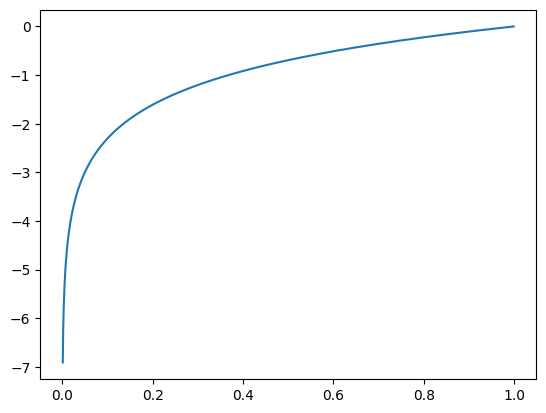

In [ ]:
plt.plot(x, y)

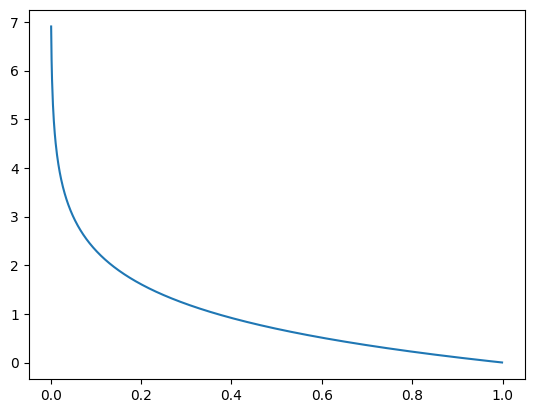

In [ ]:
plt.plot(x, -y)

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.6, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

3. 배치사이즈를 고려한 CEE

\begin{equation*}
E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} log y_{nk}
\end{equation*}

데이터 N개,

$t_{nk}$  : n번째 데이터의 k 차원째 값 (정답 레이블)

$y_{nk}$ : n번째 데이터의 k 차원째 값 (신경망 추론)

N=100, k=0~9

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    if t.size == y.size:
        t = t.argmax(axis=1)
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [ ]:
batch_size = 20

In [ ]:
np.arange(batch_size)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
t = [7, 2, 1, 3, 0 , 1,7, 2, 1, 3, 0 , 1,7, 2, 1, 3, 0 , 1,0 , 1]

In [ ]:
arr = np.arange(6).reshape(2, 3)

In [ ]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
arr[0, 2]

2

In [ ]:
arr.size

6

In [ ]:
y = np.array([[0.1 , 0.05, 0.1 , 0.  , 0.05, 0.1 , 0.  , 0.6 , 0.  , 0.  ],[0.12 , 0.15, 0.11 , 0.1  , 0.15, 0.1 , 0.  , 0.6 , 0.  , 0.  ]])

In [ ]:
y

array([[0.1 , 0.05, 0.1 , 0.  , 0.05, 0.1 , 0.  , 0.6 , 0.  , 0.  ],
       [0.12, 0.15, 0.11, 0.1 , 0.15, 0.1 , 0.  , 0.6 , 0.  , 0.  ]])

In [ ]:
np.arange(2)

array([0, 1])

In [ ]:
t = np.array([1, 2])

In [ ]:
y[np.arange(2), t]

array([0.05, 0.11])

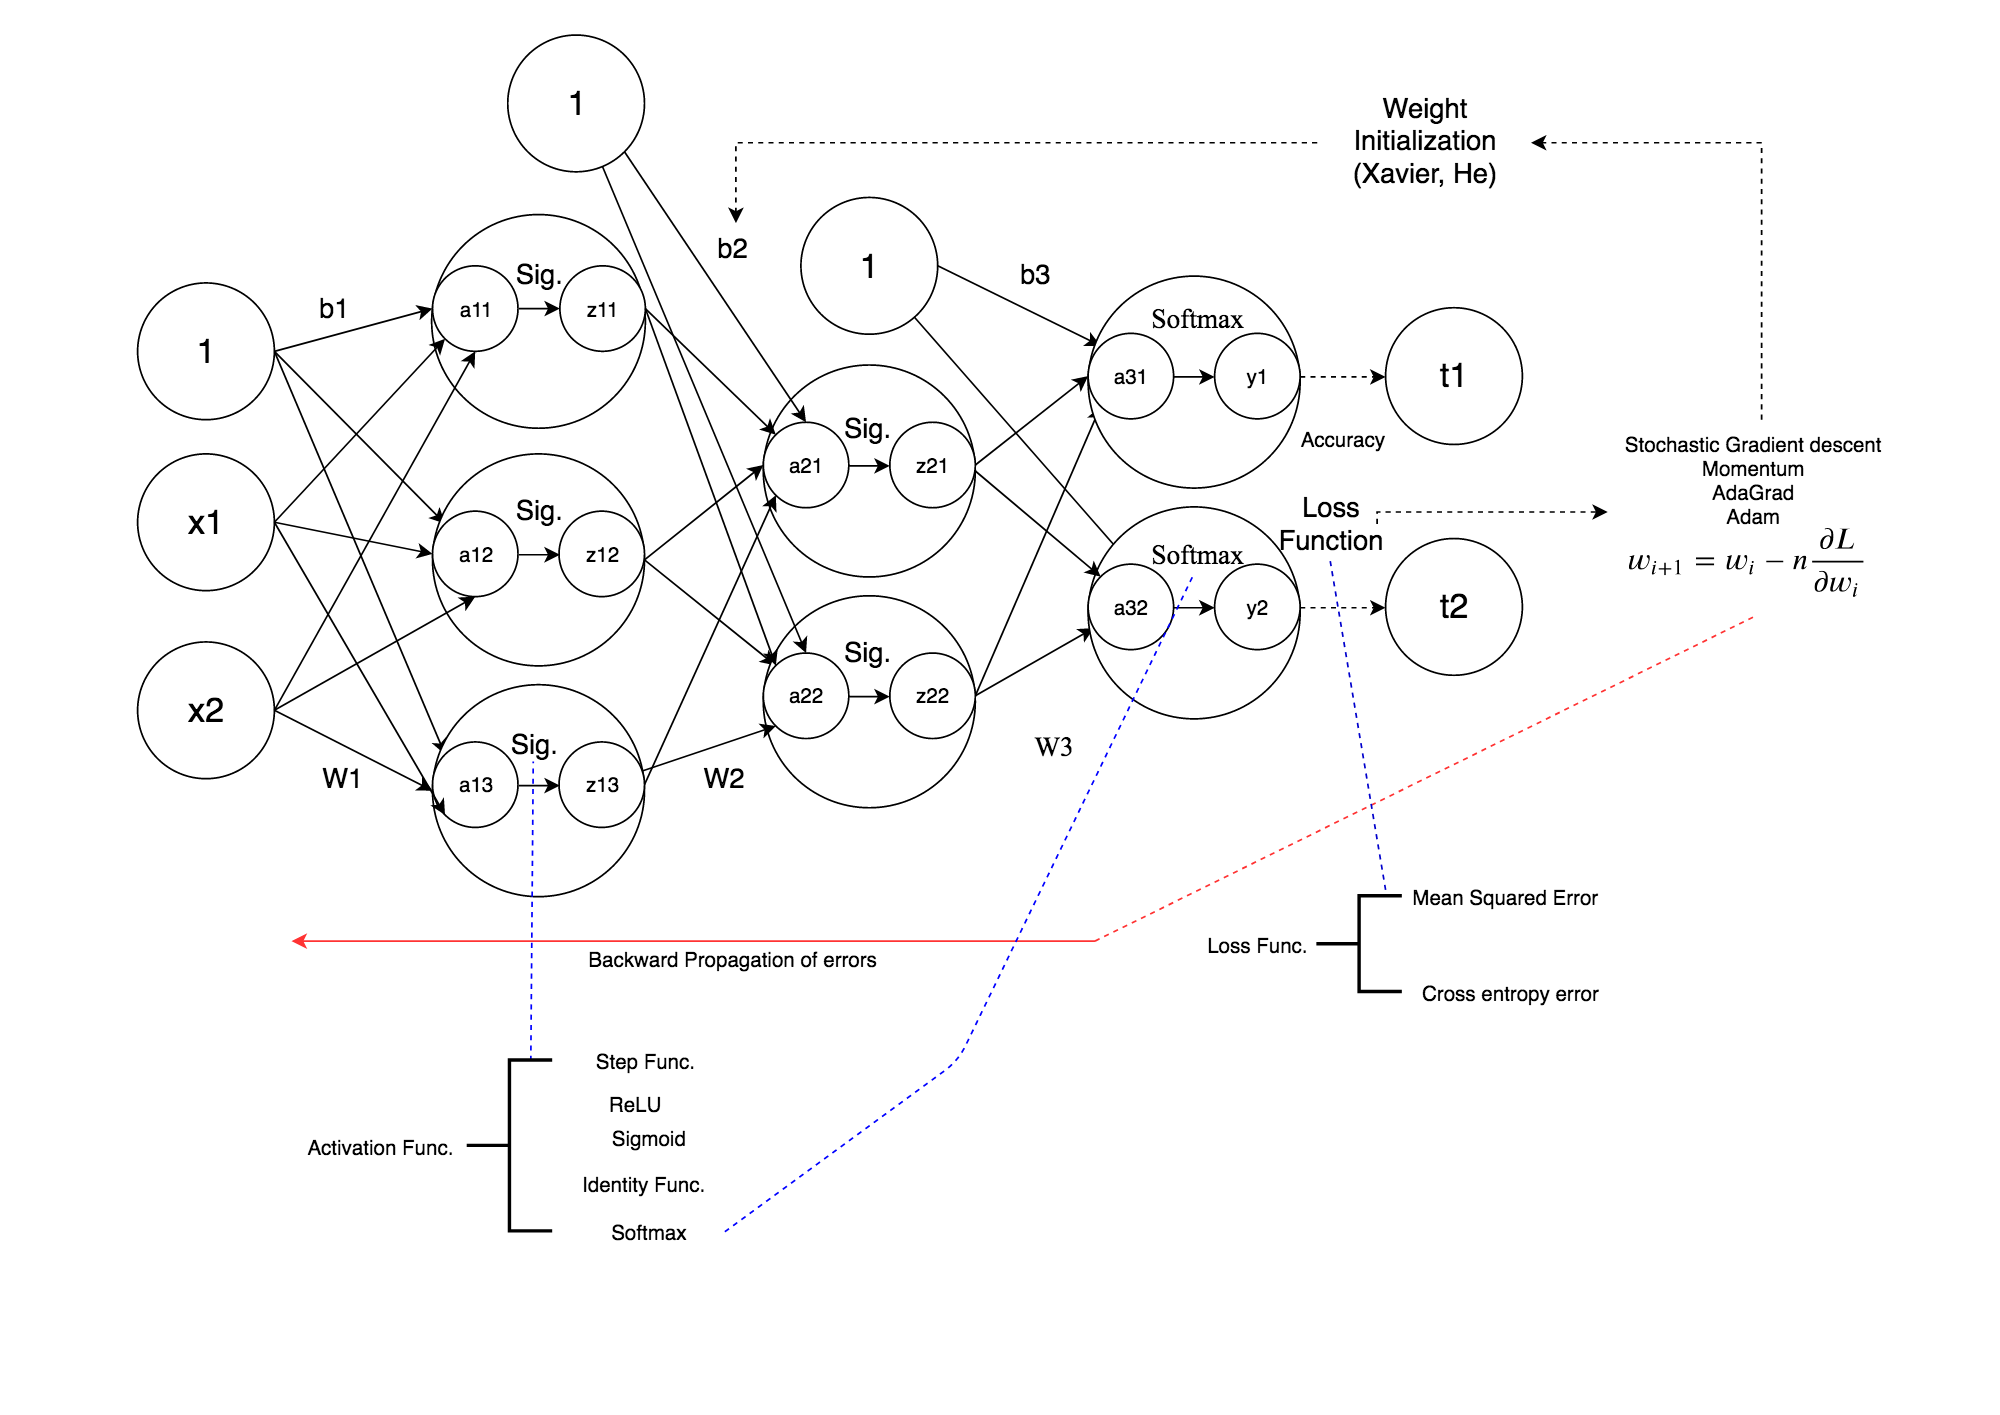

#배치사이즈가 100일때 y 의 형상
#(100 * 784)  (784, 50) (50, 100) (100, 10) -----> (100, 10)

#경사하강법